In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'C:/Users/khoat/OneDrive - National Economics University/Desktop/1. Study/3.1. Data Preparation & Visualiazation/Final/data/'

In [3]:
sample = pd.read_csv(path + 'sample.csv')
test = pd.read_csv(path + 'test.csv', sep=';')
train = pd.read_csv(path + 'train.csv', sep=';')

In [4]:
train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Maruti A-Star Lxi,2010,235000,50000,Petrol,Individual,Manual,First Owner,19.0 kmpl,998 CC,66.1 bhp,90Nm@ 3500rpm,5.0
5996,Maruti Wagon R LXI CNG,2018,390000,40000,CNG,Individual,Manual,First Owner,26.6 km/kg,998 CC,58.16 bhp,77Nm@ 3500rpm,5.0
5997,Tata Tigor 1.2 Revotron XT,2018,450000,75000,Petrol,Individual,Manual,First Owner,20.3 kmpl,1199 CC,84 bhp,114Nm@ 3500rpm,5.0
5998,Mahindra Bolero 2011-2019 DI NON AC BS III White,2011,250000,100000,Diesel,Individual,Manual,Second Owner,15.96 kmpl,2523 CC,63 bhp,180Nm@ 1440-1500rpm,9.0


# Data Preprocessing

In [5]:
for i in [train, test]:
    i['max_power'].replace(to_replace='0', value=None, inplace=True)

In [6]:
for i in [train, test]:
    i['brand'] = i.name.str.split(n=1, expand=True)[0]

for i in [train, test]:
    i['brand_extend'] = i.name.str.split(n=2, expand=True)[0] +' ' + i.name.str.split(n=2, expand=True)[1]

for i in [train, test]:
    i['n_mileage'] = i.mileage.str.split(n=1, expand=True)[0].astype('float64')

for i in [train, test]:
    i['n_engine'] = i.engine.str.split(n=1, expand=True)[0].astype('float64')

for i in [train, test]:
    i['n_max_power'] = (i.max_power.str.split(pat='b', n=1, expand=True)[0]).str.split(n=1, expand=True)[0].astype('float64')

for i in [train, test]:
    i['torque_nm'] = (((((i.torque.str.split(pat='N', n=1, expand=True)[0]).str.split(pat='n', n=1, expand=True)[0]).str.split(pat='@', n=1, expand=True)[0]).str.split(pat='k', n=1, expand=True)[0]).str.split(n=1, expand=True)[0]).str.split(pat='(', n=1, expand=True)[0].astype('float64')

for i in [train, test]:
    for j in i[i.torque.str.contains('kgm', na=False)].index:
        i.torque_nm[j] = i.torque_nm[j] * 10

In [7]:
for i in [train, test]:
    i['n_owner'] = i['owner'].copy()
    i['n_owner'].replace(to_replace='First Owner', value=1, inplace=True)
    i['n_owner'].replace(to_replace='Second Owner', value=2, inplace=True)
    i['n_owner'].replace(to_replace='Third Owner', value=3, inplace=True)
    i['n_owner'].replace(to_replace='Fourth & Above Owner', value=4, inplace=True)
    i['n_owner'].replace(to_replace='Test Drive Car', value=-1, inplace=True)

In [8]:
for i in [train, test]:
    i['brand_price'] = i['brand'].copy()
    for j in i.brand.unique():
        i['brand_price'].replace(to_replace=j, value = train[train.brand == j].selling_price.mean()/100000, inplace=True)

In [9]:
#train = train[train['selling_price'] < 9000000]

In [10]:
for i in [train, test]:
    i.fillna(i.mean(),inplace=True)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6000 non-null   object 
 1   year           6000 non-null   int64  
 2   selling_price  6000 non-null   int64  
 3   km_driven      6000 non-null   int64  
 4   fuel           6000 non-null   object 
 5   seller_type    6000 non-null   object 
 6   transmission   6000 non-null   object 
 7   owner          6000 non-null   object 
 8   mileage        5841 non-null   object 
 9   engine         5841 non-null   object 
 10  max_power      5846 non-null   object 
 11  torque         5840 non-null   object 
 12  seats          6000 non-null   float64
 13  brand          6000 non-null   object 
 14  brand_extend   6000 non-null   object 
 15  n_mileage      6000 non-null   float64
 16  n_engine       6000 non-null   float64
 17  n_max_power    6000 non-null   float64
 18  torque_n

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2128 non-null   int64  
 1   name          2128 non-null   object 
 2   year          2128 non-null   int64  
 3   km_driven     2128 non-null   int64  
 4   fuel          2128 non-null   object 
 5   seller_type   2128 non-null   object 
 6   transmission  2128 non-null   object 
 7   owner         2128 non-null   object 
 8   mileage       2066 non-null   object 
 9   engine        2066 non-null   object 
 10  max_power     2067 non-null   object 
 11  torque        2066 non-null   object 
 12  seats         2128 non-null   float64
 13  brand         2128 non-null   object 
 14  brand_extend  2128 non-null   object 
 15  n_mileage     2128 non-null   float64
 16  n_engine      2128 non-null   float64
 17  n_max_power   2128 non-null   float64
 18  torque_nm     2128 non-null 

C:\Users\khoat\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


year                AxesSubplot(0.125,0.536818;0.133621x0.343182)
selling_price    AxesSubplot(0.285345,0.536818;0.133621x0.343182)
km_driven         AxesSubplot(0.44569,0.536818;0.133621x0.343182)
seats            AxesSubplot(0.606034,0.536818;0.133621x0.343182)
n_mileage        AxesSubplot(0.766379,0.536818;0.133621x0.343182)
n_engine               AxesSubplot(0.125,0.125;0.133621x0.343182)
n_max_power         AxesSubplot(0.285345,0.125;0.133621x0.343182)
torque_nm            AxesSubplot(0.44569,0.125;0.133621x0.343182)
n_owner             AxesSubplot(0.606034,0.125;0.133621x0.343182)
brand_price         AxesSubplot(0.766379,0.125;0.133621x0.343182)
dtype: object

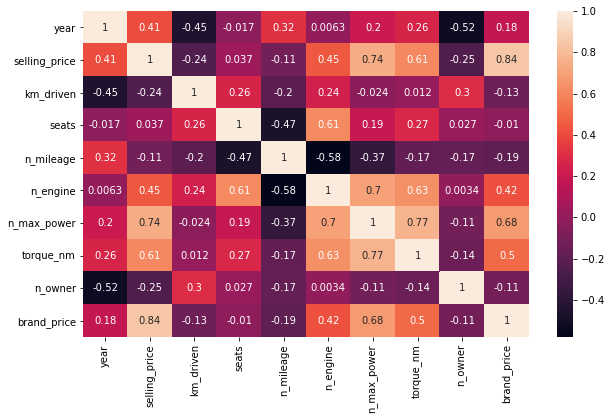

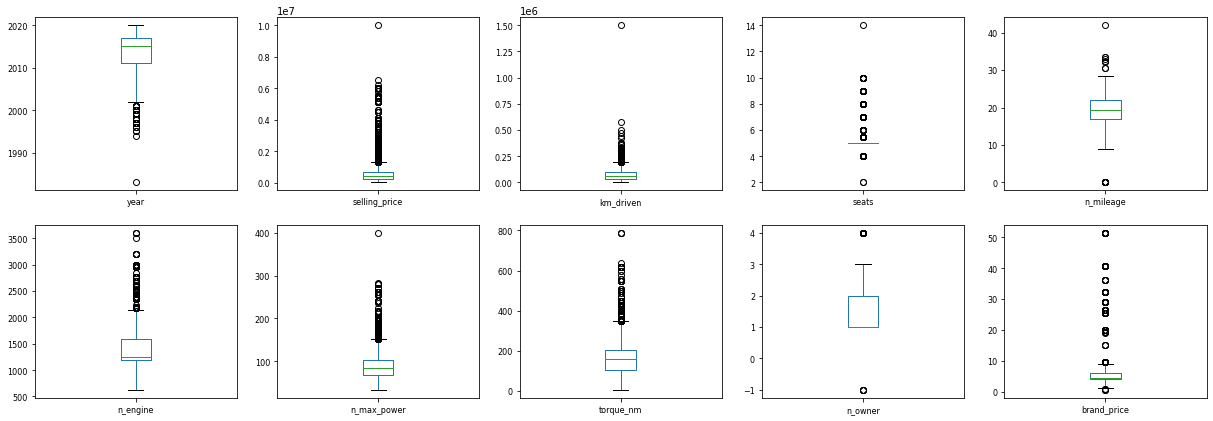

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(),annot=True)

fig = plt.figure(figsize = (21,7))
ax = fig.gca()
train.plot(kind='box', subplots=True, layout=(2,5), sharex=False, sharey=False, fontsize=8, ax=ax)

<AxesSubplot:title={'center':'selling_price'}, xlabel='brand'>

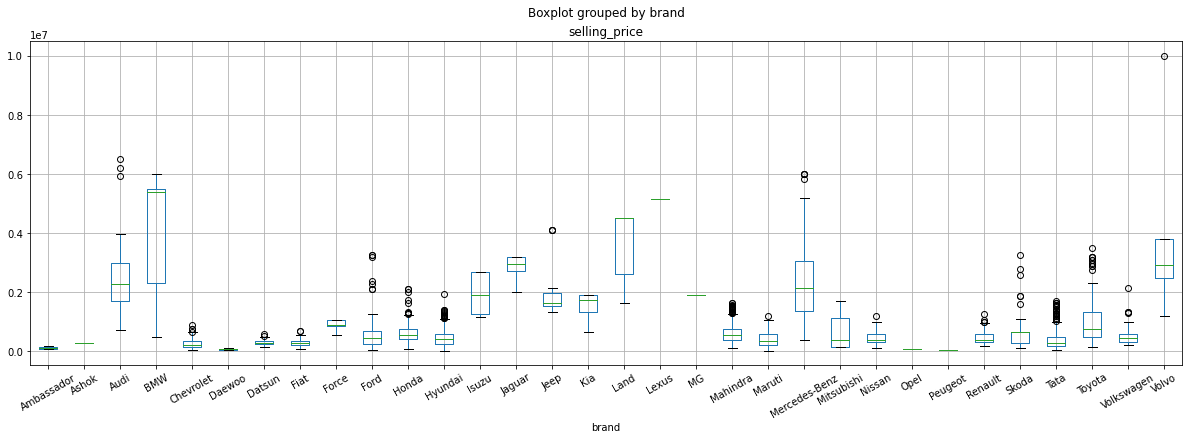

In [14]:
train.boxplot(column='selling_price', by='brand', figsize=(20,6), rot=30)

In [15]:
train = pd.concat([train, pd.get_dummies(train.fuel, drop_first=True)], axis=1)
train = pd.concat([train, pd.get_dummies(train.transmission, drop_first=True)], axis=1)
train = pd.concat([train, pd.get_dummies(train.seller_type, drop_first=True)], axis=1)

test = pd.concat([test, pd.get_dummies(test.fuel, drop_first=True)], axis=1)
test = pd.concat([test, pd.get_dummies(test.transmission, drop_first=True)], axis=1)
test = pd.concat([test, pd.get_dummies(test.seller_type, drop_first=True)], axis=1)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              6000 non-null   object 
 1   year              6000 non-null   int64  
 2   selling_price     6000 non-null   int64  
 3   km_driven         6000 non-null   int64  
 4   fuel              6000 non-null   object 
 5   seller_type       6000 non-null   object 
 6   transmission      6000 non-null   object 
 7   owner             6000 non-null   object 
 8   mileage           5841 non-null   object 
 9   engine            5841 non-null   object 
 10  max_power         5846 non-null   object 
 11  torque            5840 non-null   object 
 12  seats             6000 non-null   float64
 13  brand             6000 non-null   object 
 14  brand_extend      6000 non-null   object 
 15  n_mileage         6000 non-null   float64
 16  n_engine          6000 non-null   float64


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                2128 non-null   int64  
 1   name              2128 non-null   object 
 2   year              2128 non-null   int64  
 3   km_driven         2128 non-null   int64  
 4   fuel              2128 non-null   object 
 5   seller_type       2128 non-null   object 
 6   transmission      2128 non-null   object 
 7   owner             2128 non-null   object 
 8   mileage           2066 non-null   object 
 9   engine            2066 non-null   object 
 10  max_power         2067 non-null   object 
 11  torque            2066 non-null   object 
 12  seats             2128 non-null   float64
 13  brand             2128 non-null   object 
 14  brand_extend      2128 non-null   object 
 15  n_mileage         2128 non-null   float64
 16  n_engine          2128 non-null   float64


# Build model

In [18]:
train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,n_max_power,torque_nm,n_owner,brand_price,Diesel,LPG,Petrol,Manual,Individual,Trustmark Dealer
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,...,108.50,260.00,1,3.689275,1,0,0,1,1,0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,...,88.76,219.66,1,4.542093,1,0,0,1,1,0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,...,168.50,360.00,2,9.519480,1,0,0,0,1,0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,...,121.30,154.90,1,4.542093,0,0,1,1,1,0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,...,190.00,400.00,1,32.175000,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Maruti A-Star Lxi,2010,235000,50000,Petrol,Individual,Manual,First Owner,19.0 kmpl,998 CC,...,66.10,90.00,1,4.033088,0,0,1,1,1,0
5996,Maruti Wagon R LXI CNG,2018,390000,40000,CNG,Individual,Manual,First Owner,26.6 km/kg,998 CC,...,58.16,77.00,1,4.033088,0,0,0,1,1,0
5997,Tata Tigor 1.2 Revotron XT,2018,450000,75000,Petrol,Individual,Manual,First Owner,20.3 kmpl,1199 CC,...,84.00,114.00,1,3.689275,0,0,1,1,1,0
5998,Mahindra Bolero 2011-2019 DI NON AC BS III White,2011,250000,100000,Diesel,Individual,Manual,Second Owner,15.96 kmpl,2523 CC,...,63.00,180.00,2,6.177663,1,0,0,1,1,0


In [19]:
test

,Id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,n_max_power,torque_nm,n_owner,brand_price,Diesel,LPG,Petrol,Manual,Individual,Trustmark Dealer
0,1,Skoda Rapid 1.6 MPI AT Elegance,2016,11000,Petrol,Dealer,Automatic,First Owner,14.3 kmpl,1598 CC,...,103.50,153.00,1,6.358441,0,0,1,0,0,0
1,2,Honda City i VTEC V,2017,35000,Petrol,Individual,Manual,First Owner,17.8 kmpl,1497 CC,...,117.30,145.00,1,5.956358,0,0,1,1,1,0
2,3,Hyundai Xcent 1.2 Kappa SX Option,2014,80000,Petrol,Individual,Manual,First Owner,19.1 kmpl,1197 CC,...,82.00,114.00,1,4.542093,0,0,1,1,1,0
3,4,Mahindra Scorpio 2009-2014 SLE 7S BSIII,2014,145241,Diesel,Individual,Manual,First Owner,12.05 kmpl,2179 CC,...,120.00,290.00,1,6.177663,1,0,0,1,1,0
4,5,Ford Ecosport 1.5 Diesel Titanium,2015,92651,Diesel,Dealer,Manual,First Owner,21.7 kmpl,1498 CC,...,98.96,215.00,1,5.212743,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,2124,Hyundai Grand i10 Nios Sportz,2020,2000,Petrol,Dealer,Manual,First Owner,20.7 kmpl,1197 CC,...,81.86,113.75,1,4.542093,0,0,1,1,0,0
2124,2125,Maruti Swift Dzire VDI,2018,100000,Diesel,Individual,Manual,Second Owner,28.4 kmpl,1248 CC,...,74.02,190.00,2,4.033088,1,0,0,1,1,0
2125,2126,Tata Indica V2 DLE BSIII,2011,172000,Diesel,Individual,Manual,Second Owner,17.88 kmpl,1396 CC,...,52.80,85.00,2,3.689275,1,0,0,1,1,0
2126,2127,Hyundai Creta 1.6 CRDi SX,2017,47000,Diesel,Individual,Manual,Second Owner,19.67 kmpl,1582 CC,...,126.20,259.90,2,4.542093,1,0,0,1,1,0


In [20]:
x = train.drop(['name','fuel','selling_price','seller_type','transmission','owner','mileage','engine','max_power','torque','brand','brand_extend','n_owner','brand_price'], axis=1)
y = train['selling_price']

In [21]:
x

,year,km_driven,seats,n_mileage,n_engine,n_max_power,torque_nm,Diesel,LPG,Petrol,Manual,Individual,Trustmark Dealer
0,2018,9500,5.0,21.50,1497.0,108.50,260.00,1,0,0,1,1,0
1,2018,30000,5.0,21.19,1396.0,88.76,219.66,1,0,0,1,1,0
2,2015,80000,7.0,12.55,2982.0,168.50,360.00,1,0,0,0,1,0
3,2015,35000,5.0,17.01,1591.0,121.30,154.90,0,0,1,1,1,0
4,2019,20000,5.0,18.00,1969.0,190.00,400.00,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2010,50000,5.0,19.00,998.0,66.10,90.00,0,0,1,1,1,0
5996,2018,40000,5.0,26.60,998.0,58.16,77.00,0,0,0,1,1,0
5997,2018,75000,5.0,20.30,1199.0,84.00,114.00,0,0,1,1,1,0
5998,2011,100000,9.0,15.96,2523.0,63.00,180.00,1,0,0,1,1,0


In [22]:
x_test = test.drop(['Id','name','fuel','seller_type','transmission','owner','mileage','engine','max_power','torque','brand','brand_extend','n_owner','brand_price'], axis=1)

In [23]:
x_test

,year,km_driven,seats,n_mileage,n_engine,n_max_power,torque_nm,Diesel,LPG,Petrol,Manual,Individual,Trustmark Dealer
0,2016,11000,5.0,14.30,1598.0,103.50,153.00,0,0,1,0,0,0
1,2017,35000,5.0,17.80,1497.0,117.30,145.00,0,0,1,1,1,0
2,2014,80000,5.0,19.10,1197.0,82.00,114.00,0,0,1,1,1,0
3,2014,145241,7.0,12.05,2179.0,120.00,290.00,1,0,0,1,1,0
4,2015,92651,5.0,21.70,1498.0,98.96,215.00,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,2020,2000,5.0,20.70,1197.0,81.86,113.75,0,0,1,1,0,0
2124,2018,100000,5.0,28.40,1248.0,74.02,190.00,1,0,0,1,1,0
2125,2011,172000,5.0,17.88,1396.0,52.80,85.00,1,0,0,1,1,0
2126,2017,47000,5.0,19.67,1582.0,126.20,259.90,1,0,0,1,1,0


In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn import metrics

In [26]:
result3 = pd.DataFrame(columns=['max_depth','n_es', 'Train_RMSE', 'Train_R^2'])

for i in range(13,16):
    for j in range(19,25):
        extra_tree = ExtraTreesRegressor(random_state=42, max_depth=i, n_estimators=j)
        extra_tree.fit(x,y)

        train_pred = extra_tree.predict(x)

        train_rmse = np.sqrt(metrics.mean_squared_error(y, train_pred))
        train_r2 = metrics.r2_score(y, train_pred)

        result3 = result3.append(pd.Series({'max_depth': i,'n_es': j, 'Train_RMSE':train_rmse, 'Train_R^2':train_r2}), ignore_index=True)

result3.sort_values(by='Train_RMSE')

,max_depth,n_es,Train_RMSE,Train_R^2
12,15.0,19.0,45901.770607,0.996761
17,15.0,24.0,45983.344846,0.996750
13,15.0,20.0,46429.665109,0.996687
16,15.0,23.0,46453.322916,0.996683
14,15.0,21.0,46457.342446,0.996683
15,15.0,22.0,46673.498351,0.996652
6,14.0,19.0,52120.989864,0.995824
9,14.0,22.0,52632.129587,0.995742
7,14.0,20.0,52654.981020,0.995738
8,14.0,21.0,52757.525667,0.995722


In [27]:
extra_tree = ExtraTreesRegressor(random_state=42, max_depth=15, n_estimators=19)
extra_tree.fit(x,y)

ExtraTreesRegressor(max_depth=15, n_estimators=19, random_state=42)

In [29]:
train_pred = extra_tree.predict(x)

In [30]:
print('Train set:')
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, train_pred)))
print('R^2 :', metrics.r2_score(y, train_pred))

Train set:
RMSE: 45901.77060693923
R^2 : 0.9967614787334771


In [31]:
test_pred = extra_tree.predict(x_test)

In [35]:
submit = sample.copy()

In [36]:
submit.Predicted = test_pred

In [37]:
submit

,Id,Predicted
0,1,6.442576e+05
1,2,8.756695e+05
2,3,4.188439e+05
3,4,6.015659e+05
4,5,5.201076e+05
...,...,...
2123,2124,6.250948e+05
2124,2125,7.262847e+05
2125,2126,1.463966e+05
2126,2127,1.058015e+06


In [38]:
#submit.to_csv(path_or_buf= path + 'submit_17_12_1.csv', index=False)